In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


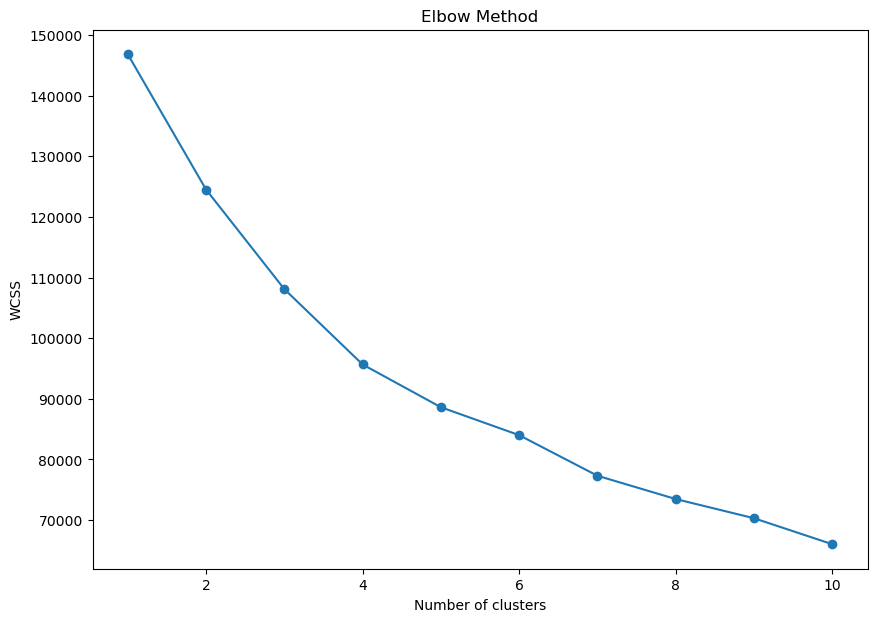

In [19]:
df = df.select_dtypes(include=[float, int])
df = df.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Определение количества кластеров методом Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

В результате получаем 10 кластеров

In [20]:
optimal_clusters = 10
hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
df['Cluster'] = hc.fit_predict(scaled_data)
print(df['Cluster'].value_counts())

Cluster
7    2627
0    1879
6    1040
2     998
3     852
4     679
1     414
9     105
5      23
8      19
Name: count, dtype: int64


Кластеры 7, 0 и 6 содержат наибольшее количество точек данных. Это значит, что большинство клиентов группируются по этим характеристикам.

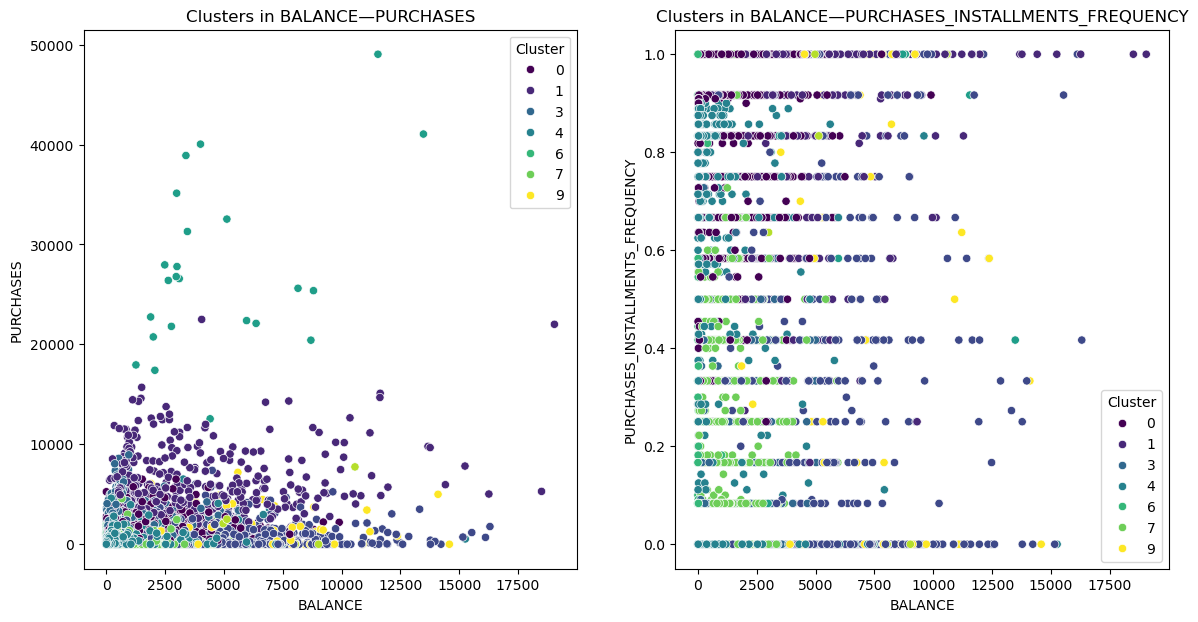

In [21]:
plt.figure(figsize=(14, 7))

# График BALANCE—PURCHASES
plt.subplot(1, 2, 1)
sns.scatterplot(x='BALANCE', y='PURCHASES', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters in BALANCE—PURCHASES')

# График: BALANCE—PURCHASER_INSTALLMENTS_FREQUENCY
plt.subplot(1, 2, 2)
sns.scatterplot(x='BALANCE', y='PURCHASES_INSTALLMENTS_FREQUENCY', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters in BALANCE—PURCHASES_INSTALLMENTS_FREQUENCY')

plt.show()

In [23]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Проверка результатов кластеризации
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
-1     6488
 0     1689
 6      173
 23      30
 11      22
 15      19
 3       17
 8       14
 20      13
 18      11
 28      10
 5        9
 22       9
 1        8
 9        8
 13       7
 17       7
 26       7
 10       7
 4        6
 30       5
 35       5
 29       5
 2        5
 21       5
 7        5
 27       5
 24       5
 25       5
 14       5
 32       5
 16       5
 19       5
 31       5
 33       4
 12       4
 34       4
Name: count, dtype: int64


Результаты кластеризации методом DBSCAN показывают что многие точки помечены как шум (кластер -1). Такие точки не подходят ни под один кластер.

Сравнение:

Иерархическая кластеризация:
Проще интерпретироать. Иерархическая кластеризация делит данные на большие и малые кластеры, которые можно легко интерпретировать. Большие кластеры показывают общие группы клиентов, а малые кластеры могут указывать на специфические группы. Большинство данных распределено по кластерам, и нет большого количества точек, помеченных как шум.

DBSCAN:
Этот метод хорошо выявляет точки, которые не соответствуют никакому кластеру, что может быть полезно для выбросов.
Большинство точек помечено как шум или распределено по очень маленьким кластерам, что может затруднить интерпретацию результатов